# Telecom Customer Churn Analysis - Machine Learning Models Development

In this analysis, we aim to develop a classification machine learning model to predict whether or not a customer will churn. The workflow of this analysis can be summarized as:
1. Data preprocessing:
- Get the data
    1. Import the datasets
    2. Inspect the datasets
    3. Merge the datasets
    4. Subset useful features
- Clean and preprocess the data
    1. Impute missing value
    2. Convert binary features to numeric
    3. Apply one-hot encoding
    4. Split the dataset
    5. Scale the features

2. Machine learning modellling
- Logistic regression
    - Logistic regression using all features
    - Features selection - recursive features elimination (RFE)
- k-nearest neighbors
    - Base model: k=1
    - Hyperparameter tuning: grid search
- Decision tree
    - Base model: no regularization
    - Hyperparameter tuning: grid search

3. Model Finalization
- Compare the performance of the three models
- Determine the best model 

**Workflow Overview**

1. Data Preprocessing
- Data Acquisition

    - Import the datasets
    - Inspect the datasets
    - Merge datasets
    - Select relevant features
    - Clean the datasets

- Handle missing values (imputation)
    - Convert binary categorical features to numeric
    - Apply one-hot encoding for categorical variables
    - Split the dataset into training and testing sets
    - Scale numerical features for better model performance

2. Machine Learning Modeling
- Logistic Regression

    - Train a logistic regression model using all features
    - Perform feature selection using Recursive Feature Elimination (RFE) 

- k-Nearest Neighbors (KNN)

    - Train a baseline KNN model with 𝑘=1
    - Optimize hyperparameters using grid search


3. Decision Tree

    - Train a baseline decision tree model without regularization
    - Tune hyperparameters using grid search

3. Model Evaluation & Finalization
- Compare the performance of all three models using evaluation metrics
- Select the best-performing model for deployment

In [238]:
# Import all modules used in this analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import warnings

In [239]:
# Suppress all warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

### Getting the data

In this section, we will:

1. Import the three datasets needed for building machine learning models.
2. Explore their features and structure.
3. Merge the datasets into a unified dataset for analysis.
4. Subset useful features for machine learning modelling.

#### 1. Import the datasets

In [240]:
# Import all datasets used in this analysis
demographics = pd.read_csv('Data/Telco_customer_churn_demographics.csv')
status = pd.read_csv('Data/Telco_customer_churn_status.csv')
services = pd.read_csv('Data/Telco_customer_churn_services.csv')

#### 2. Inspect the three datasets

In [241]:
print('Inspection of the demographics dataset:')
print(demographics.info())

Inspection of the demographics dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB
None


In [242]:
print('Inspection of the status dataset:')
print(status.info())

Inspection of the status dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status ID           7043 non-null   object
 1   Customer ID         7043 non-null   object
 2   Count               7043 non-null   int64 
 3   Quarter             7043 non-null   object
 4   Satisfaction Score  7043 non-null   int64 
 5   Customer Status     7043 non-null   object
 6   Churn Label         7043 non-null   object
 7   Churn Value         7043 non-null   int64 
 8   Churn Score         7043 non-null   int64 
 9   CLTV                7043 non-null   int64 
 10  Churn Category      1869 non-null   object
 11  Churn Reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB
None


The two columns 'Churn Category' and 'Churn Reason' have missing data, this aligns with our expectation that only churned customers have these two attributes.

In [243]:
print('Inspection of the customer services dataset:')
print(services.info())

Inspection of the customer services dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter                            7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Se

The 'Internet Type' column has null values. We will impute it with the string 'None' later on.

**This dataset contains the 'Churn Label' column, which is the target feature for our analysis**

#### 3. Merge the three datasets

In [244]:
data = pd.merge(status, services, on='Customer ID', how='inner')
data = pd.merge(data, demographics, on='Customer ID', how='inner')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status ID                          7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count_x                            7043 non-null   int64  
 3   Quarter_x                          7043 non-null   object 
 4   Satisfaction Score                 7043 non-null   int64  
 5   Customer Status                    7043 non-null   object 
 6   Churn Label                        7043 non-null   object 
 7   Churn Value                        7043 non-null   int64  
 8   Churn Score                        7043 non-null   int64  
 9   CLTV                               7043 non-null   int64  
 10  Churn Category                     1869 non-null   object 
 11  Churn Reason                       1869 non-null   objec

In [245]:
# Export the combined data for further analysis
# data.to_csv('Data/Combined_Data.csv')

#### 4. Subsets useful features

To assess whether a feature is useful for machine learning modeling, we apply the following criteria:

1. **Not a unique identifier** – Features like 'Customer ID' are excluded.
2. **Sufficient variability** – The feature must have at least two distinct values (e.g., the feature 'Quarter' containing only "Q3" is not useful).
3. **Acceptable missing values** – The feature should have less than 15% missing data.
4. **Manageable categorical levels** – Categorical features should have fewer than 10 unique values, as too many categories can complicate one-hot encoding.
5. **Relevance for prediction** – Features like 'Churn Reason' and 'Churn Category' are available only for churned customers, making them unsuitable for predictive modeling.
6. **Other considerations** – Additional factors may also influence feature selection.

In [246]:
# These are the features selected, with 'Churn Lable' as the target variable
data = data[['Gender', 'Age', 'Married', 'Number of Dependents', 'Number of Referrals', 
             'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges',
             'Multiple Lines', 'Internet Type', 'Avg Monthly GB Download', 'Online Security',
             'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 
             'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 
             'Total Long Distance Charges', 'Satisfaction Score', 'Churn Label']]

In [247]:
# Inspect the dataset for machine learning modelling
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Phone Service                      7043 non-null   object 
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Cleaning and preprocessing 

In this section, we will perform the following data cleaning steps:

1. **Impute missing values** - Impute the null value in the "Internet Type" column with the value "No Internet Service".
2. **Convert binary features to numeric** – Identify categorical variables with exactly two distinct values and convert them into integer features (0 and 1).
3. **Apply one-hot encoding** – Transform categorical variables with three or more distinct values into numerical representations.
4. **Split the dataset** – Divide the data into training and testing sets for model evaluation.
5. **Feature scaling** – Standardize numeric features to ensure they have the same scale.


#### 1. Impute missing values

In [248]:
# Replace null value in the column "Internet Type" with "No Internet Service"
data.loc[data["Internet Type"].isnull(), "Internet Type"] = "No Internet Service"

#### 2. Convert binary features to numeric

In [249]:
# Identify all binary features
binary_features = [] # To store all binary features
for feature in data.columns:
    if data[feature].nunique()==2:
        binary_features.append(feature)
print("All columns with only two distinct values: \n", binary_features)

All columns with only two distinct values: 
 ['Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Churn Label']


We would also like to extract all numeric features at this stage, which are the features that need to be normalized for machine leanring modelling.

In [250]:
# Extract numeric features (float and int) to apply StandardScaler, except for those whose values are either 0 or 1
numeric_features = data.select_dtypes(exclude='object').columns

In [251]:
# Inspect the distinct values of binary features
for feature in data.columns:
    if data[feature].nunique()==2:
        print("The unique values of the feature", feature, "are:", data[feature].drop_duplicates().tolist())


The unique values of the feature Gender are: ['Male', 'Female']
The unique values of the feature Married are: ['No', 'Yes']
The unique values of the feature Phone Service are: ['No', 'Yes']
The unique values of the feature Multiple Lines are: ['No', 'Yes']
The unique values of the feature Online Security are: ['No', 'Yes']
The unique values of the feature Online Backup are: ['No', 'Yes']
The unique values of the feature Device Protection Plan are: ['Yes', 'No']
The unique values of the feature Premium Tech Support are: ['No', 'Yes']
The unique values of the feature Streaming TV are: ['No', 'Yes']
The unique values of the feature Streaming Movies are: ['Yes', 'No']
The unique values of the feature Streaming Music are: ['No', 'Yes']
The unique values of the feature Unlimited Data are: ['No', 'Yes']
The unique values of the feature Paperless Billing are: ['Yes', 'No']
The unique values of the feature Churn Label are: ['Yes', 'No']


The 'Gender' column has two distinct values: 'Male' and 'Female', while others are 'Yes' and 'No'. 

We will convert the values 'Male' and 'Yes' to 1, 'Female' and 'No' to 0.

In [252]:
# For the column 'Gender', we convert 'Male' to 1 and 'Female' to 0
data['Gender'] = data['Gender'].map({'Male': '1', 'Female': '0'}).astype(int)

# Remove 'Gender' from binary_features after converting
binary_features.remove('Gender')

# For other columns, we convert 'Yes' to 1, 'No' to 0
for feature in binary_features:
    data[feature] = data[feature].map({'Yes': '1', 'No': '0'}).astype(int)

#### 3. Apply one-hot encoding

We are left with the only categorical variables are 'Payment Method', 'Internet Type' and 'Contract', we would like to explore their distinct values.

In [253]:
data = pd.get_dummies(data)

#### 4. Split the dataset

In [254]:
# Define predictors X and target y
X = data.drop('Churn Label', axis=1)
y = data[['Churn Label']]

In [255]:
# Using test_size = 0.2 to split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The shape of the training set is:", X_train.shape)
print("The shape of the testing set is:", X_test.shape)

The shape of the training set is: (5634, 35)
The shape of the testing set is: (1409, 35)


#### 5. Scale the features

In [256]:
# We use standard scaler to normalize the numeric column
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

## Machine Learning Modelling

In this section, we will explore three learning algorithms: Logistic Regression, k-Nearest Neighbors, and Random Forest, through experimentation.

### Logistic Regression

#### Logistic Regression using all features

In [257]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [258]:
# Evaluation on training and testing data: accuracy and f1-score
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.95
f1-score score testing data: 0.90
Accuracy score training data: 0.97
f1-score score training data: 0.93


In [259]:
# Get features coefficients as a dataframe column
coefficients = np.transpose(logreg.coef_)
coefficients_df = pd.DataFrame(coefficients, columns=['Coefficients'])
coefficients_abs_df = pd.DataFrame(np.abs(coefficients), columns=['Coefficients_abs'])

# Get features as a dataframe column
features_df = pd.DataFrame(X_train.columns, columns=['Features'])

# Merge the previous 2 dataframes: feature importance
feature_importance = pd.concat([features_df, coefficients_df, coefficients_abs_df], axis=1)
print(feature_importance.sort_values(by=['Coefficients_abs'], ascending=False)[['Features', 'Coefficients']])


                             Features  Coefficients
24                 Satisfaction Score     -6.985916
10                    Online Security     -2.828729
4                 Number of Referrals     -1.666370
2                             Married      1.347193
5                    Tenure in Months     -1.326967
19                     Monthly Charge      0.904967
31                  Contract_Two Year     -0.898405
6                       Phone Service     -0.869954
3                Number of Dependents     -0.700900
29            Contract_Month-to-Month      0.691242
20                      Total Charges      0.524484
13               Premium Tech Support     -0.497444
33         Payment Method_Credit Card     -0.459337
11                      Online Backup     -0.403600
27          Internet Type_Fiber Optic     -0.379995
8                      Multiple Lines      0.340777
18                  Paperless Billing      0.326325
17                     Unlimited Data     -0.279850
1           

#### Features selection - recursive features elimination (RFE)

In [260]:
# Using recursive features elimination to test every possible combination of features
accuracy_scores = [] # To store the accuracy score of each iteration
f1_scores = [] # To store the f1-score of each iteration
for i in range(1, X_train.shape[1]+1): 
    rfe = RFE(estimator=logreg, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

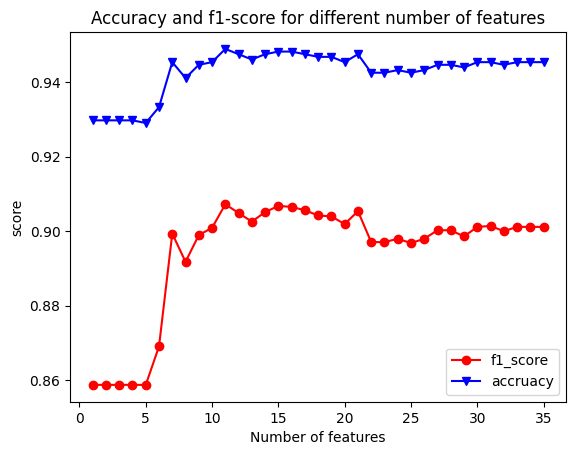

In [261]:
# Plot the accuracy and f1-score for each iteration to determine the best number of features
plt.plot(np.arange(1, X_train.shape[1] + 1), f1_scores, label = 'f1_score', color = 'r', marker = 'o')
plt.plot(np.arange(1, X_train.shape[1] + 1), accuracy_scores, label = 'accruacy', color = 'b', marker = 'v')
plt.title('Accuracy and f1-score for different number of features')
plt.xlabel('Number of features')
plt.ylabel('score')
plt.legend()

The chart shows that the optimal number of features is somewhere around 11, we will extract the best number of features programmatically.

In [262]:
# Extract the best number of features
best_num_features = accuracy_scores.index(max(accuracy_scores)) + 1
print("The optimal number of features for modelling is:", best_num_features)

The optimal number of features for modelling is: 11


In [263]:
best_logreg = RFE(estimator=logreg, n_features_to_select=best_num_features)
best_logreg.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=11)

In [264]:
# Evaluation on training and testing data: accuracy and f1-score
y_pred = best_logreg.predict(X_test)
y_pred_train = best_logreg.predict(X_train)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.95
f1-score score testing data: 0.91
Accuracy score training data: 0.96
f1-score score training data: 0.92


In [265]:
# Get the accuracy and f1-score for best_logreg (for visualization at the end of the project)
best_logreg_acc = accuracy_score(y_test, y_pred)
best_logreg_f1 = f1_score(y_test, y_pred)
print(best_logreg_acc)
print(best_logreg_f1)

0.9488999290276792
0.9072164948453608


In [266]:
# Getting the list of retained features
retained_features = []
support = best_logreg.support_
for idx, feature in enumerate(X_train.columns):
    if support[idx]:
        retained_features.append(feature)
print(retained_features)

['Married', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Online Security', 'Premium Tech Support', 'Monthly Charge', 'Satisfaction Score', 'Contract_Two Year', 'Payment Method_Credit Card']


## K-Nearest Neighbor

#### Base model: K=1

In [267]:
one_nn = KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X_train[retained_features], y_train)

KNeighborsClassifier(n_neighbors=1)

In [268]:
#Evaluation on training and testing data: accuracy and f1-score
y_pred = one_nn.predict(X_test[retained_features])
y_pred_train = one_nn.predict(X_train[retained_features])
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.93
f1-score score testing data: 0.87
Accuracy score training data: 1.00
f1-score score training data: 1.00


#### Hyperparameter tuning: grid search

In [269]:
param_grid = {
    'n_neighbors': np.arange(1,31).tolist(),
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    return_train_score=True  # Ensures train scores are available
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train[retained_features], y_train)

# Best hyperparameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_.round(2))


Best parameters: {'n_neighbors': 9}
Best cross-validation accuracy: 0.96


In [270]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train[retained_features], y_train)

KNeighborsClassifier(n_neighbors=9)

In [271]:
#Evaluation on training and testing data: accuracy and f1-score
y_pred = best_knn.predict(X_test[retained_features])
y_pred_train = best_knn.predict(X_train[retained_features])
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.94
f1-score score testing data: 0.89
Accuracy score training data: 0.96
f1-score score training data: 0.93


In [272]:
# Get the accuracy and f1-score for best_knn(for visualization at the end of the project)
best_knn_acc = accuracy_score(y_test, y_pred)
best_knn_f1 = f1_score(y_test, y_pred)
print(best_knn_acc)
print(best_knn_f1)

0.9396735273243435
0.8906048906048906


## Decision Tree

#### Base model: no regularization

In [273]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train[retained_features], y_train)

DecisionTreeClassifier(random_state=42)

In [274]:
y_pred_train = dt_clf.predict(X_train[retained_features])
y_pred = dt_clf.predict(X_test[retained_features])
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.94
f1-score score testing data: 0.89
Accuracy score training data: 1.00
f1-score score training data: 1.00


#### Hyperparameter tuning: grid search

In [275]:
param_max_depth = {'max_depth': np.arange(1, 15, 1).tolist(),
                   'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_max_depth,
    scoring='accuracy',       # Metric to optimize (e.g., 'accuracy', 'f1')
    cv=5,                   # Number of cross-validation folds             
    n_jobs=-1               # Number of parallel jobs (-1 uses all CPUs)
)
grid_search.fit(X_train[retained_features], y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters: {'criterion': 'gini', 'max_depth': 8}
Best cross-validation accuracy: 0.96


In [276]:
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train[retained_features], y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [277]:
y_pred_train = best_dt_clf.predict(X_train[retained_features])
y_pred = best_dt_clf.predict(X_test[retained_features])
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred):.2f}")
print(f"f1-score score testing data: {f1_score(y_test, y_pred):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"f1-score score training data: {f1_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.95
f1-score score testing data: 0.90
Accuracy score training data: 0.96
f1-score score training data: 0.93


In [278]:
# Get the accuracy and f1-score for best_dt_clf (for visualization at the end of the project)
best_dt_clf_acc = accuracy_score(y_test, y_pred)
best_dt_clf_f1 = f1_score(y_test, y_pred)
print(best_dt_clf_acc)
print(best_dt_clf_f1)

0.9453513129879347
0.8985507246376812


In [280]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [287]:
importance = model.feature_importances_
imp_df = pd.DataFrame(importance, columns=['importance'])
features = X_train.columns
ft_df = pd.DataFrame(features, columns=['features'])
df = pd.concat([imp_df, ft_df], axis=1)
print(df.sort_values(by=['importance'], ascending=False))

    importance                           features
24    0.842819                 Satisfaction Score
5     0.037872                   Tenure in Months
10    0.023530                    Online Security
19    0.018206                     Monthly Charge
1     0.013615                                Age
4     0.013507                Number of Referrals
29    0.010506            Contract_Month-to-Month
33    0.009111         Payment Method_Credit Card
20    0.006908                      Total Charges
3     0.005028               Number of Dependents
28    0.004288  Internet Type_No Internet Service
7     0.003205  Avg Monthly Long Distance Charges
32    0.002680     Payment Method_Bank Withdrawal
22    0.002621           Total Extra Data Charges
23    0.002394        Total Long Distance Charges
9     0.001736            Avg Monthly GB Download
14    0.000928                       Streaming TV
15    0.000783                   Streaming Movies
13    0.000262               Premium Tech Support


## Model Finalization

In this section, we will:
1. Compare the performance of the three models.
2. Dertermine the highest-performing model, and provide justifications for the decision.
3. Give a more thorough evaluation of the model peformance

#### 1. Performance of the three models

In [ ]:
# Models for comparison
models = ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree']

# Extract the accuracy score and the f1-score of the three models
accuracy_scores_final = [best_logreg_acc, best_knn_acc, best_dt_clf_acc]
f1_score_final = [best_logreg_f1, best_knn_f1, best_dt_clf_f1]

Text(0, 0.5, 'Accuracy Score')

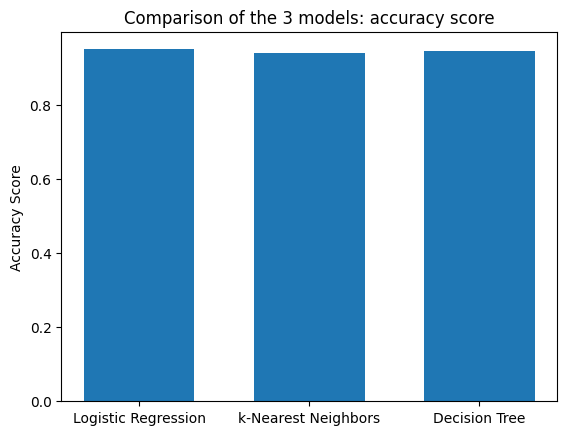

In [ ]:
# Plot accuracy score of the three models
plt.bar(x=models, height=accuracy_scores_final, width=0.65)
plt.title('Comparison of the 3 models: accuracy score')
plt.ylabel('Accuracy Score')

Text(0, 0.5, 'F1-score')

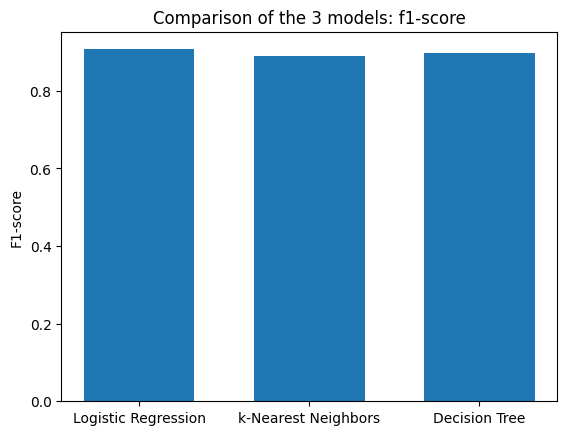

In [ ]:
# Plot f1-score of the three models
plt.bar(x=models, height=f1_score_final, width=0.65)
plt.title('Comparison of the 3 models: f1-score')
plt.ylabel('F1-score')

Both plots indicate that the performance of the three models is similar, with logistic regression slightly outperforming the other two.

#### 2. Determine the best model

We decide to choose **Logistic Regression** for deployment because of the three reasons:
1. **Interpretability** – Easier to understand and explain, making it more suitable for decision-making.
2. **Efficient Training and Inference** – Requires less computational power and runs faster compared to complex models.
3. **Easier Deployment** – Can be implemented in resource-constrained environments

Therefore, the chosen model is:

In [294]:
best_model = best_logreg